<a href="https://colab.research.google.com/github/vasantbala/vb_ai_course/blob/main/neural_networks/projects/NN_BankChurnPrediction_Rough.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('https://github.com/vasantbala/vb_ai_course/raw/main/neural_networks/projects/bank.csv')

In [3]:
data.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [4]:
data.isna().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [6]:
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [7]:
data['RowNumber'].nunique()

10000

In [8]:
data.nunique()

RowNumber          10000
CustomerId         10000
Surname             2932
CreditScore          460
Geography              3
Gender                 2
Age                   70
Tenure                11
Balance             6382
NumOfProducts          4
HasCrCard              2
IsActiveMember         2
EstimatedSalary     9999
Exited                 2
dtype: int64

In [9]:
data['Geography'].unique()

array(['France', 'Spain', 'Germany'], dtype=object)

In [10]:
data_lean = data.copy(True)

In [11]:
data_lean.drop('RowNumber', 1, inplace=True)

In [12]:
data_lean.drop('CustomerId', 1, inplace=True)   

In [13]:
data_lean.drop('Surname', 1, inplace=True)

In [14]:
data_encoded = pd.get_dummies(data_lean, prefix='Geo', columns=['Geography'])
data_encoded.head()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geo_France,Geo_Germany,Geo_Spain
0,619,Female,42,2,0.00,1,1,1,101348.88,1,1,0,0
1,608,Female,41,1,83807.86,1,0,1,112542.58,0,0,0,1
2,502,Female,42,8,159660.80,3,1,0,113931.57,1,1,0,0
3,699,Female,39,1,0.00,2,0,0,93826.63,0,1,0,0
4,850,Female,43,2,125510.82,1,1,1,79084.10,0,0,0,1


In [15]:
data_encoded.drop('Geo_Spain', axis=1, inplace=True)

In [16]:
data_encoded.head()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geo_France,Geo_Germany
0,619,Female,42,2,0.00,1,1,1,101348.88,1,1,0
1,608,Female,41,1,83807.86,1,0,1,112542.58,0,0,0
2,502,Female,42,8,159660.80,3,1,0,113931.57,1,1,0
3,699,Female,39,1,0.00,2,0,0,93826.63,0,1,0
4,850,Female,43,2,125510.82,1,1,1,79084.10,0,0,0


In [17]:
data_encoded = pd.get_dummies(data_encoded, prefix='Gender', columns=['Gender'], drop_first=True)
data_encoded.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geo_France,Geo_Germany,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,1,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,0,0
2,502,42,8,159660.80,3,1,0,113931.57,1,1,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,1,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,0,0


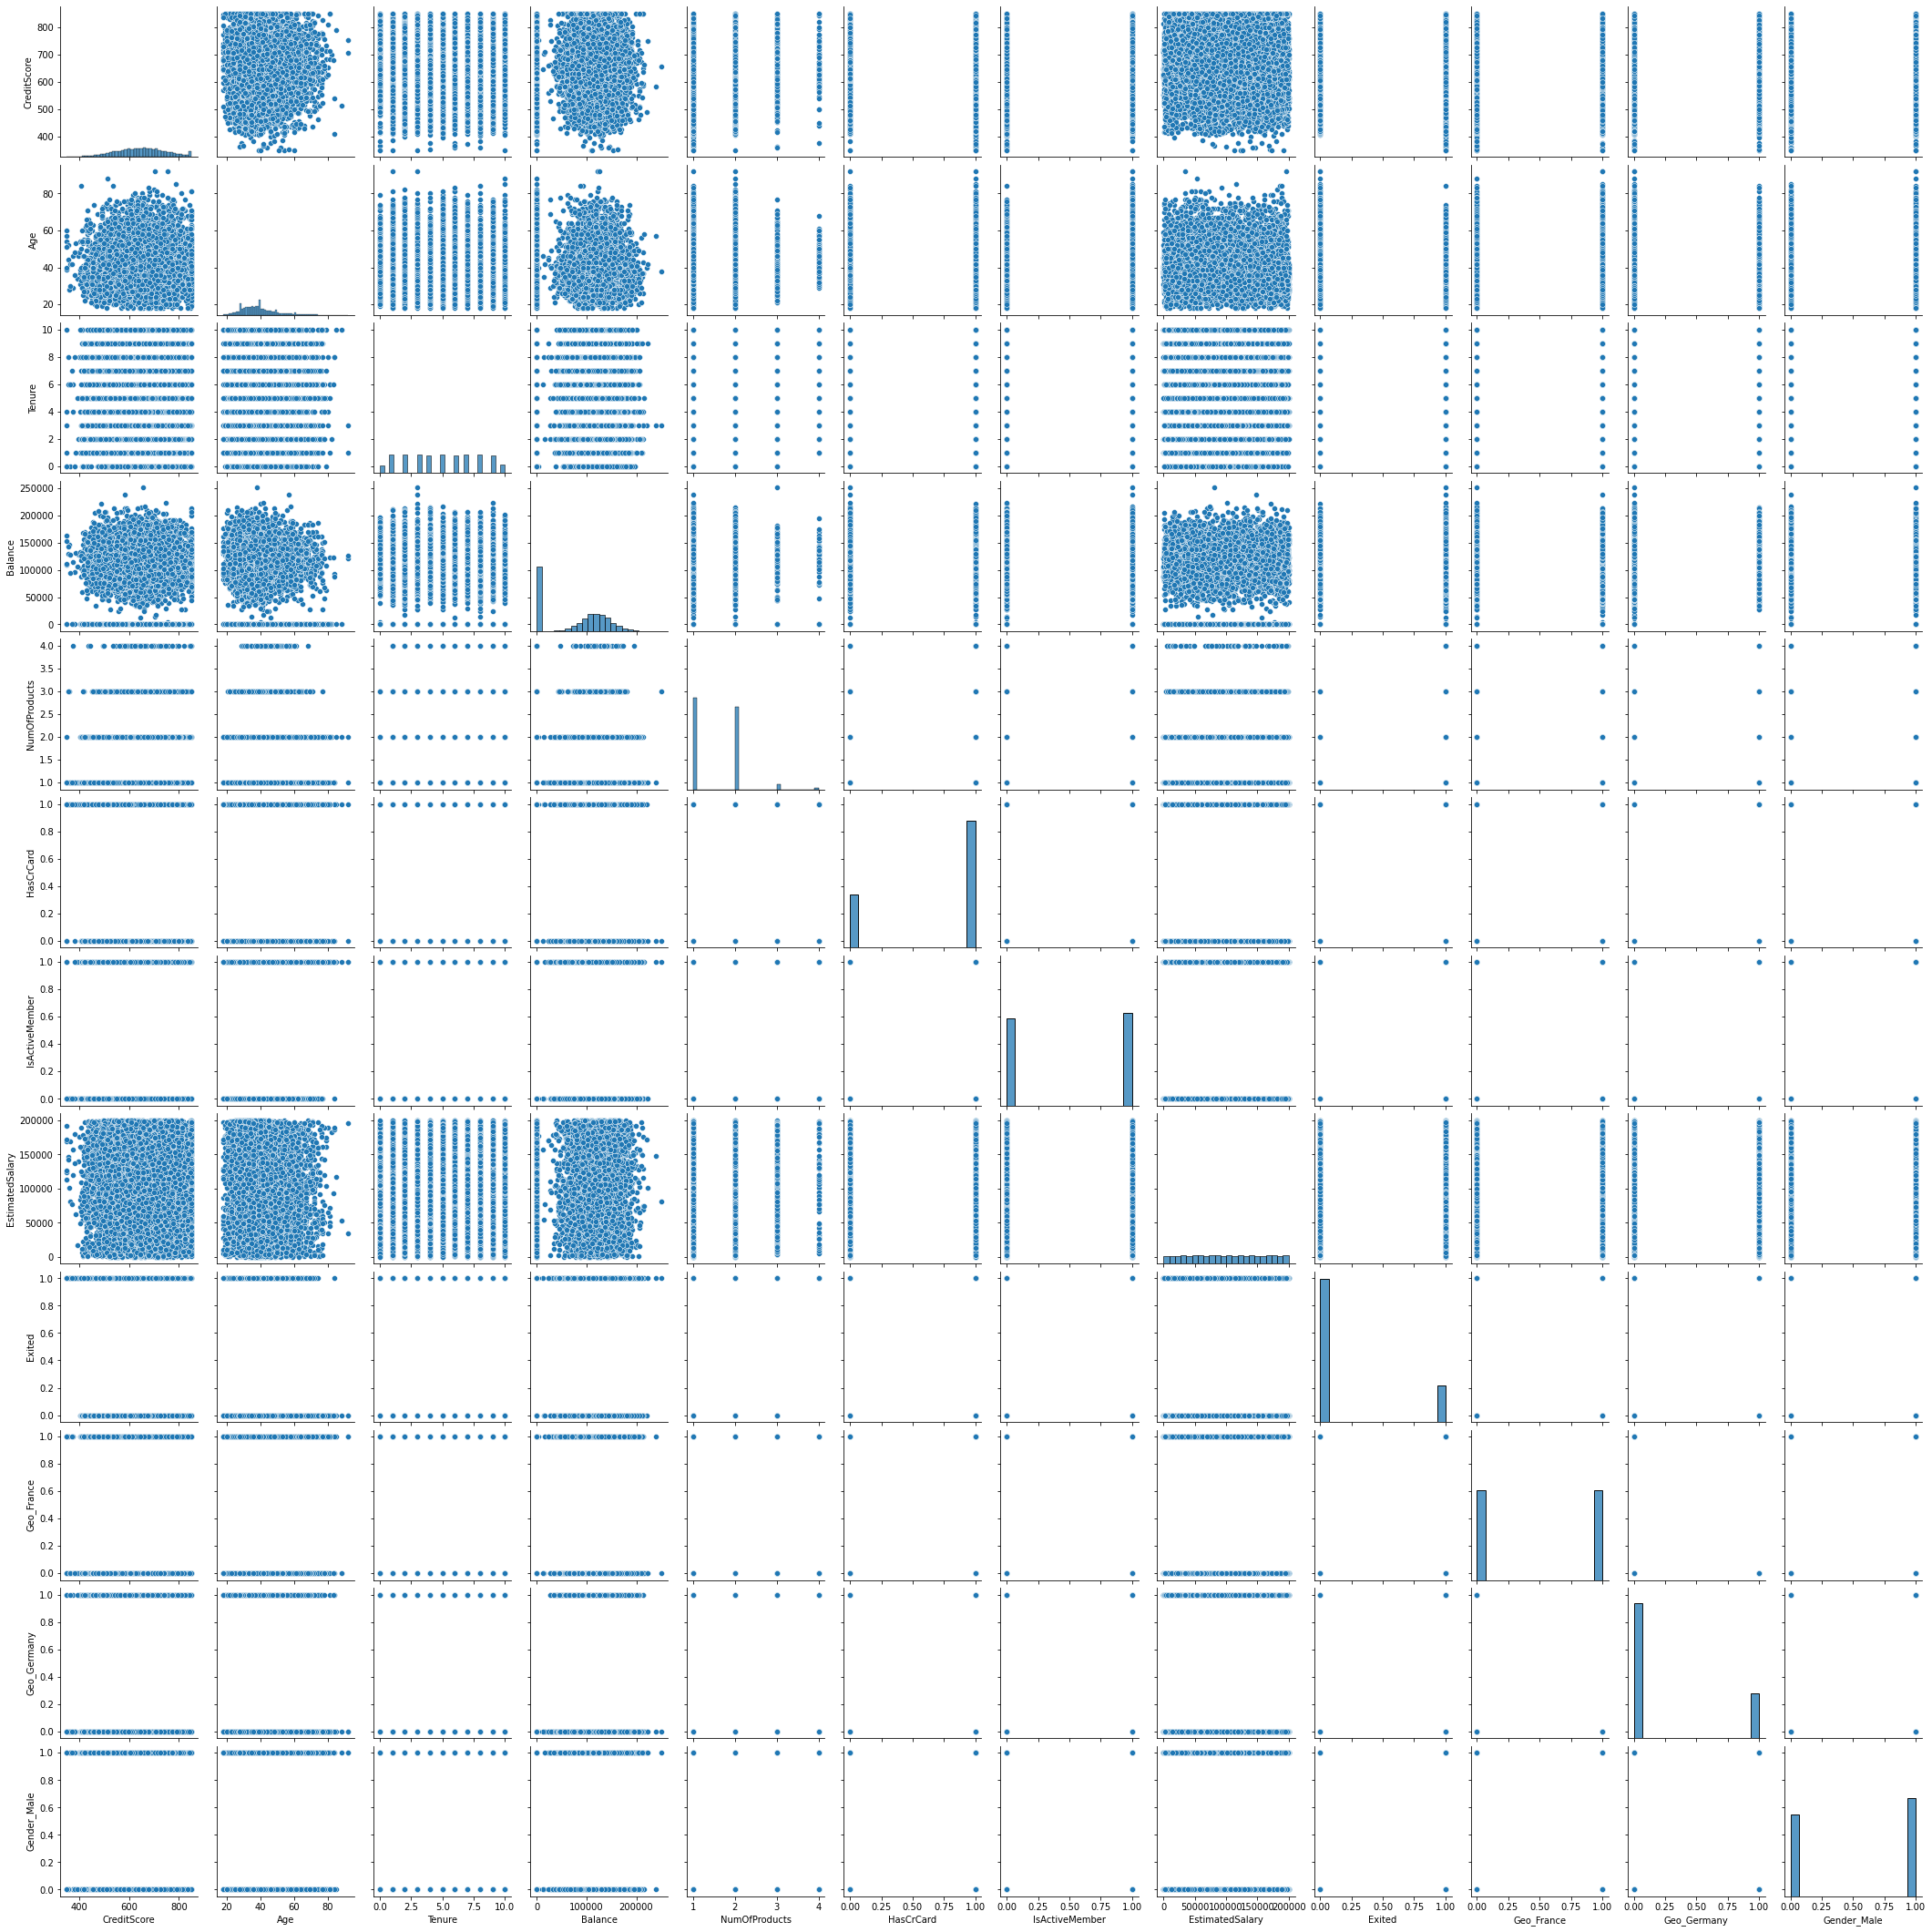

In [18]:
sns.pairplot(data_encoded)

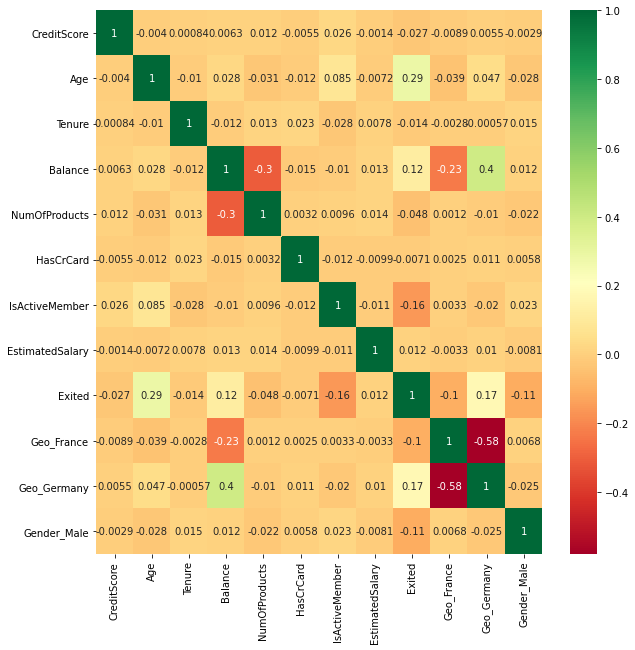

In [19]:
plt.figure(figsize=(10,10))
g=sns.heatmap(data_encoded.corr(),annot=True,cmap="RdYlGn")

In [20]:
data_encoded.head()



,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geo_France,Geo_Germany,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,1,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,0,0
2,502,42,8,159660.80,3,1,0,113931.57,1,1,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,1,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,0,0


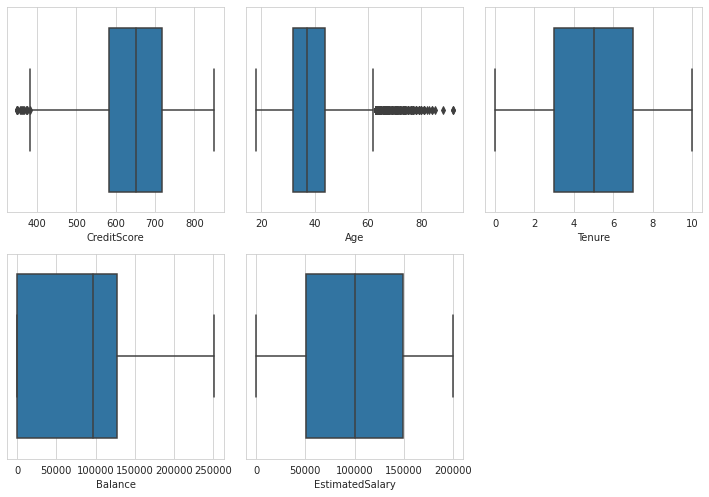

In [21]:
f = plt.figure(figsize=(10, 10))
gs = f.add_gridspec(3, 3)

with sns.axes_style("whitegrid"):
    ax = f.add_subplot(gs[0, 0])
    sns.boxplot(x=data_encoded['CreditScore'])

with sns.axes_style("whitegrid"):
    ax = f.add_subplot(gs[0, 1])
    sns.boxplot(x=data_encoded['Age'])

with sns.axes_style("whitegrid"):
    ax = f.add_subplot(gs[0, 2])
    sns.boxplot(x=data_encoded['Tenure'])

with sns.axes_style("whitegrid"):
    ax = f.add_subplot(gs[1, 0])
    sns.boxplot(x=data_encoded['Balance'])

with sns.axes_style("whitegrid"):
    ax = f.add_subplot(gs[1, 1])
    sns.boxplot(x=data_encoded['EstimatedSalary'])    

f.tight_layout()

In [22]:
## transform CreditScore and Age to overcome skewness
#for col in ['CreditScore', 'Age']:    
    #data_encoded[col] = data_encoded[col].map(lambda i: np.log(i) if i > 0 else 0)


In [23]:

# apply the z-score method in Pandas using the .mean() and .std() methods
def z_score(df):
    # copy the dataframe
    data_normalized = df.copy()
    # apply the z-score method
    for column in ['CreditScore', 'Age', 'Balance', 'EstimatedSalary']:
        data_normalized[column] = (data_normalized[column] - data_normalized[column].mean()) / data_normalized[column].std()
        
    return data_normalized
    
# call the z_score function
data_normalized = z_score(data_encoded)

data_normalized.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geo_France,Geo_Germany,Gender_Male
0,-0.326205,0.293503,2,-1.225786,1,1,1,0.021885,1,1,0,0
1,-0.440014,0.198154,1,0.117344,1,0,1,0.216523,0,0,0,0
2,-1.536717,0.293503,8,1.332987,3,1,0,0.240675,1,1,0,0
3,0.501496,0.007456,1,-1.225786,2,0,0,-0.108912,0,1,0,0
4,2.063781,0.388852,2,0.785689,1,1,1,-0.365258,0,0,0,0


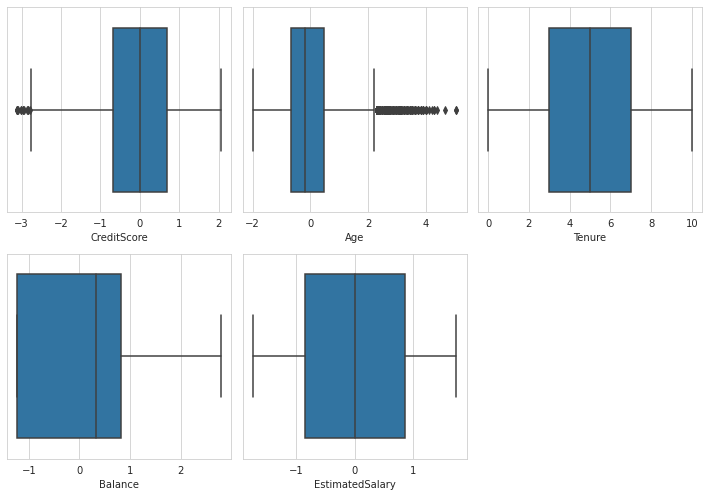

In [24]:
f = plt.figure(figsize=(10, 10))
gs = f.add_gridspec(3, 3)

with sns.axes_style("whitegrid"):
    ax = f.add_subplot(gs[0, 0])
    sns.boxplot(x=data_normalized['CreditScore'])

with sns.axes_style("whitegrid"):
    ax = f.add_subplot(gs[0, 1])
    sns.boxplot(x=data_normalized['Age'])

with sns.axes_style("whitegrid"):
    ax = f.add_subplot(gs[0, 2])
    sns.boxplot(x=data_normalized['Tenure'])

with sns.axes_style("whitegrid"):
    ax = f.add_subplot(gs[1, 0])
    sns.boxplot(x=data_normalized['Balance'])

with sns.axes_style("whitegrid"):
    ax = f.add_subplot(gs[1, 1])
    sns.boxplot(x=data_normalized['EstimatedSalary'])    

f.tight_layout()

In [25]:
from sklearn.model_selection import train_test_split

In [26]:
y = data_encoded['Exited']
X = data_encoded.drop('Exited', axis = 1)

In [27]:
X.head()  

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geo_France,Geo_Germany,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,0
2,502,42,8,159660.80,3,1,0,113931.57,1,0,0
3,699,39,1,0.00,2,0,0,93826.63,1,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,0


In [28]:
y.head()

0    1
1    0
2    1
3    0
4    0
Name: Exited, dtype: int64

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state = 42)

In [30]:
y_train =  np.array(y_train)
y_test =  np.array(y_test)

In [31]:
from sklearn.preprocessing import StandardScaler

# Define the scaler 
scaler = StandardScaler().fit(X_train)

# Scale the train set
X_train = scaler.transform(X_train)

# Scale the test set
X_test = scaler.transform(X_test)

In [32]:
import warnings
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense


In [45]:
ncols = X_train.shape[0]

# Initialize the constructor
model = Sequential()
# Add an first hidden layer 
model.add(Dense(20, activation='relu', kernel_initializer='normal'))
# second hidden layer
model.add(Dense(10, activation='relu', kernel_initializer='normal'))
# Add an output layer with one neuron and no activation specified
model.add(Dense(1, activation = 'sigmoid'))

In [46]:
model.compile(optimizer='sgd', loss='categorical_crossentropy',  metrics = ['accuracy'])

In [47]:
model.fit(X_train,y_train,epochs=10,validation_data=(X_test,y_test),batch_size=X_train.shape[0])

Epoch 1/10
1/1 [==============================] - 1s 553ms/step - loss: 0.0000e+00 - accuracy: 0.7280 - val_loss: 0.0000e+00 - val_accuracy: 0.8037
Epoch 2/10
1/1 [==============================] - 0s 43ms/step - loss: 0.0000e+00 - accuracy: 0.7910 - val_loss: 0.0000e+00 - val_accuracy: 0.8053
Epoch 3/10
1/1 [==============================] - 0s 46ms/step - loss: 0.0000e+00 - accuracy: 0.7924 - val_loss: 0.0000e+00 - val_accuracy: 0.8053
Epoch 4/10
1/1 [==============================] - 0s 45ms/step - loss: 0.0000e+00 - accuracy: 0.7924 - val_loss: 0.0000e+00 - val_accuracy: 0.8053
Epoch 5/10
1/1 [==============================] - 0s 44ms/step - loss: 0.0000e+00 - accuracy: 0.7924 - val_loss: 0.0000e+00 - val_accuracy: 0.8053
Epoch 6/10
1/1 [==============================] - 0s 41ms/step - loss: 0.0000e+00 - accuracy: 0.7924 - val_loss: 0.0000e+00 - val_accuracy: 0.8053
Epoch 7/10
1/1 [==============================] - 0s 47ms/step - loss: 0.0000e+00 - accuracy: 0.7924 - val_loss: 0.00

In [38]:

# Initialize the constructor
model2 = Sequential()
# Add an first hidden layer 
model2.add(Dense(6, activation='relu'))
# second hidden layer
model2.add(Dense(6, activation='relu'))
# second hidden layer
model2.add(Dense(1, activation='sigmoid'))
model2.compile(optimizer='adam', loss='binary_crossentropy',  metrics = ['accuracy'])
model2.fit(X_train,y_train, batch_size=32, epochs = 100)

Epoch 1/100
219/219 [==============================] - 1s 1ms/step - loss: 0.6473 - accuracy: 0.6018
Epoch 2/100
219/219 [==============================] - 0s 1ms/step - loss: 0.4754 - accuracy: 0.8074
Epoch 3/100
219/219 [==============================] - 0s 1ms/step - loss: 0.4650 - accuracy: 0.8048
Epoch 4/100
219/219 [==============================] - 0s 1ms/step - loss: 0.4392 - accuracy: 0.8100
Epoch 5/100
219/219 [==============================] - 0s 1ms/step - loss: 0.4351 - accuracy: 0.8185
Epoch 6/100
219/219 [==============================] - 0s 1ms/step - loss: 0.4208 - accuracy: 0.8253
Epoch 7/100
219/219 [==============================] - 0s 1ms/step - loss: 0.4092 - accuracy: 0.8390
Epoch 8/100
219/219 [==============================] - 0s 1ms/step - loss: 0.4168 - accuracy: 0.8218
Epoch 9/100
219/219 [==============================] - 0s 1ms/step - loss: 0.4037 - accuracy: 0.8332
Epoch 10/100
219/219 [==============================] - 0s 1ms/step - loss: 0.3918 - accura

In [50]:
#X_train, X_test, y_train, y_test
y_pred = model2.predict(X_test)
y_pred = (y_pred > 0.5)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[0 0]
 [0 0]
 [0 0]
 ...
 [0 0]
 [0 0]
 [0 0]]


In [51]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[2336   80]
 [ 313  271]]


0.869